# Data Science - Proyecto final - Coderhouse

Fernando Martínez Chehda

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv("credit_customers.csv")
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


Audiencia objetivo: Empresas financieras, organizaciones no gubernamentales, entidades o individuos que entregan/reciben créditos, personas interesadas en la ciencia de datos / análisis / riesgo crediticio / modelos de machine learning.

# Abstract

Este proyecto tiene como objetivo determinar el riesgo asociado a la concesión de créditos a clientes mediante técnicas de machine learning. Se utiliza un dataset que contiene información relevante sobre los clientes, como duración del crédito solicitado, ahorros aproximados al momento de la solicitud, propósito del crédito y edad, entre otros. Estas características se consideran fundamentales para evaluar el riesgo de devolución de un préstamo.

Para saber que variables sería apropiado analizar, se exploró la relevancia del "Scoring Crediticio", un método ampliamente utilizado por las empresas financieras para evaluar el riesgo de conceder créditos a sus clientes. El Scoring Crediticio es un modelo matemático que emplea variables financieras y características del cliente para asignar una puntuación que refleja la probabilidad de que dicho cliente cumpla con sus obligaciones crediticias. En base a esta información pública, se intentó tomar condiciones similares para que el proyecto cuente con una dosis de realidad. Además, se crearon gráficos utilizando las bibliotecas de visualización matplotlib y seaborn que permitieron visualizar de una manera más sencilla la relación que existía entre las variables seleccionadas.

Se evaluó la efectividad de diferentes modelos de machine learning, como regresión logística, árboles de decisión, random forest y redes neuronales, entre otros, para predecir el riesgo de crédito. Cada modelo se somete a una evaluación utilizando métricas de rendimiento, como precisión, recall y F1-score, con el objetivo de determinar cuál ofrece el mejor desempeño en la clasificación de clientes en las categorías de riesgo "bajo" y "alto".

Los resultados preliminares muestran que el modelo de Regresión Logística y el Random Forest presentan una precisión y recall razonables en la clasificación de los clientes. No obstante, se continúa optimizando los hiperparámetros y explorando otras técnicas de ajuste para mejorar la efectividad general del modelo.

En conclusión, este proyecto busca crear un modelo predictivo de riesgo de crédito y entender cómo las empresas utilizan el scoring crediticio en la práctica para tomar decisiones financieras informadas. El aprendizaje obtenido en este proyecto puede contribuir a seguir perfeccionando estos modelos y asegurar que sean justos y precisos al evaluar el riesgo crediticio de los clientes.

# Hipótesis

#### Hipótesis 1: A medida que la edad de los solicitantes de crédito disminuye, el riesgo asociado a la entrega del crédito tiende a aumentar.

#### Hipótesis 2: La estabilidad laboral de una persona influye significativamente en el nivel de riesgo crediticio. Se espera que aquellos con un empleo estable tengan un menor riesgo al ser evaluados para la concesión de un crédito

#### Hipótesis 3: La cantidad de ahorros de una persona se relaciona directamente con el riesgo de no devolver un crédito. Se anticipa que aquellos individuos con un mayor nivel de ahorros presenten un menor riesgo crediticio.

Análisis descriptivo de datos:

Se crea nueva columna para sacar un ratio entre el monto y la duracion

In [4]:
data['credit_duration_ratio'] = data['credit_amount'] / data['duration']

<AxesSubplot:xlabel='age', ylabel='class'>

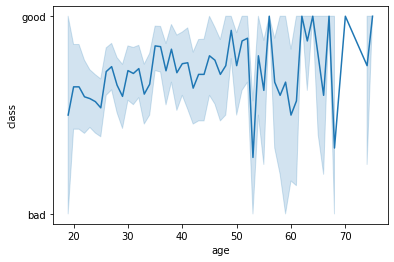

In [5]:
sns.lineplot(data=data, x='age', y='class')

<AxesSubplot:xlabel='class', ylabel='age'>

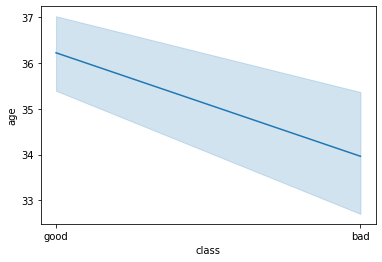

In [6]:
sns.lineplot(data=data, x='class', y='age')

Se puede apreciar una clara tendencia que indica que a medida que la edad aumenta, el riesgo asociado a la entrega de un crédito disminuye.

A continuación, se procederá a realizar un análisis más detallado de la columna de edad para examinar los datos disponibles.

In [7]:
data['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

Podemos ver en base al desvío estándar y los cuartiles que este dataset trabaja con un amplio rango etario, lo cual es bueno. Me gustaría ver la relación de las edades con los ahorros o con la cantidad de crédito que se pidió, ¿serán las personas jóvenes más riesgosas o conservadoras al momento de pedir un préstamo?

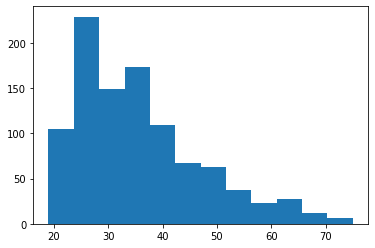

In [8]:
plt.hist(data['age'], bins=12)
plt.show()

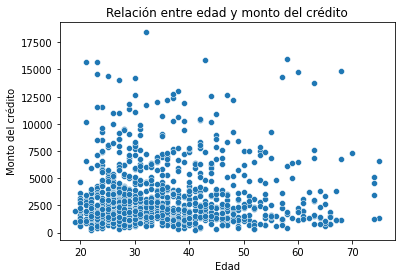

In [9]:
sns.scatterplot(data=data, x='age', y='credit_amount')
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Relación entre edad y monto del crédito')
plt.show()

In [10]:
data['age'] = data['age'].astype(int)
data['age']

0      67
1      22
2      49
3      45
4      53
       ..
995    31
996    40
997    38
998    23
999    27
Name: age, Length: 1000, dtype: int32

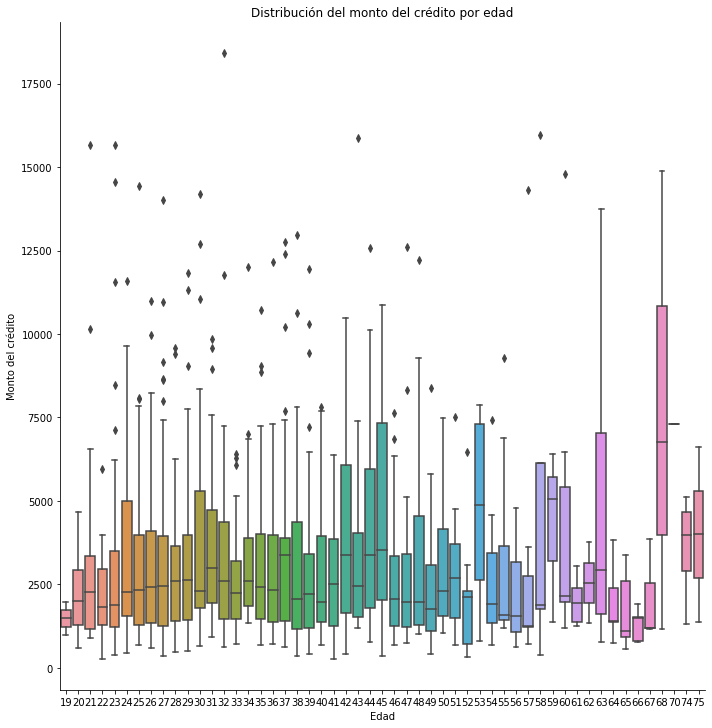

In [11]:
data['age'].astype(int)
sns.catplot(data=data, x='age', y='credit_amount', kind='box', height= 10)
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Distribución del monto del crédito por edad')
plt.show()

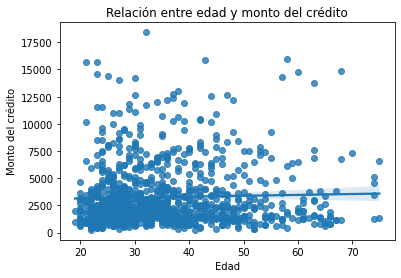

In [12]:
sns.regplot(data=data, x='age', y='credit_amount')
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Relación entre edad y monto del crédito')
plt.show()

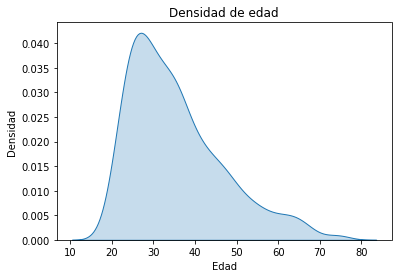

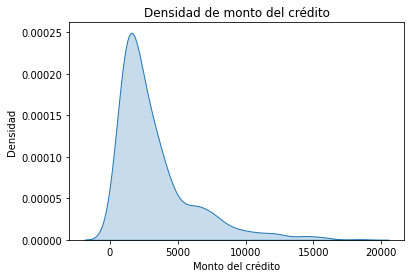

In [13]:
sns.kdeplot(data=data, x='age', fill=True)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Densidad de edad')
plt.show()

sns.kdeplot(data=data, x='credit_amount', fill=True)
plt.xlabel('Monto del crédito')
plt.ylabel('Densidad')
plt.title('Densidad de monto del crédito')
plt.show()

Observamos en base a los gráficos que por lo menos en este dataset la edad y el monto del crédito solicitado no tienen una relación significante 

<AxesSubplot:xlabel='class', ylabel='employment'>

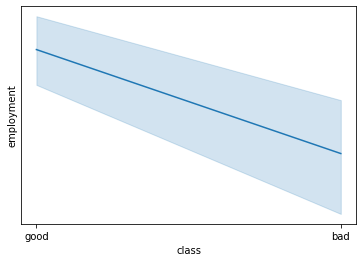

In [14]:
sns.lineplot(data=data, x='class', y='employment')

In [15]:
cambios_employment = {
    'unemployed': 0,
    '<1': 0.5,
    '4<=X<7': 5.5,
    '>=7': 7,
    '1<=X<4': 2.2
}

data['employment'] = data['employment'].replace(cambios_employment)
data['employment']

0      7.0
1      2.2
2      5.5
3      5.5
4      2.2
      ... 
995    5.5
996    2.2
997    7.0
998    2.2
999    0.0
Name: employment, Length: 1000, dtype: float64

<AxesSubplot:xlabel='employment', ylabel='class'>

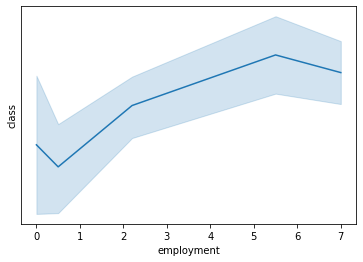

In [16]:
sns.lineplot(data=data, x='employment', y='class')

<AxesSubplot:xlabel='employment', ylabel='count'>

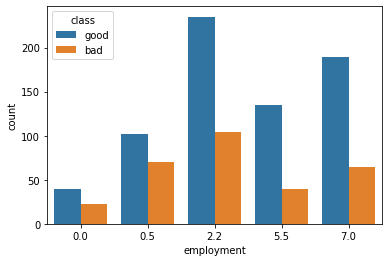

In [17]:
sns.countplot(x='employment', hue='class', data=data)

In [18]:
promedio_credit_amount = data.groupby(['employment', 'class'])['credit_amount'].mean().unstack()
diferencia_promedio = promedio_credit_amount['good'] - promedio_credit_amount['bad']
diferencia_promedio

employment
0.0     -64.527313
0.5    -660.760784
2.2   -1158.096154
5.5    -548.500855
7.0   -1620.091683
dtype: float64

Si bien estamos trabajando en base a promedios, podemos ver que se cumple la hipótesis, a mayor tiempo trabajado, menor riesgo de entregar un crédito. Ahora trabajaremos con la tercer hipótesis:

In [20]:
data['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

In [21]:
data['savings_status'] = data['savings_status'].replace({
    'no known savings': 0,
    '<100': 50,
    '500<=X<1000': 750,
    '>=1000': 1000,
    '100<=X<500': 350
})
data['savings_status']

0        0
1       50
2       50
3       50
4       50
      ... 
995     50
996     50
997     50
998     50
999    350
Name: savings_status, Length: 1000, dtype: int64

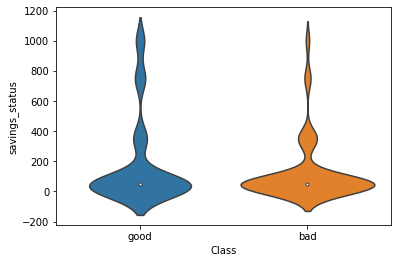

In [22]:
sns.violinplot(data=data, x='class', y='savings_status')
plt.xlabel('Class')
plt.show()

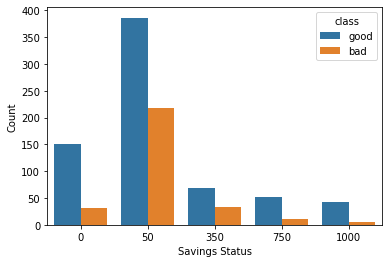

In [23]:
sns.countplot(data=data, x='savings_status', hue='class')
plt.xlabel('Savings Status')
plt.ylabel('Count')
plt.show()

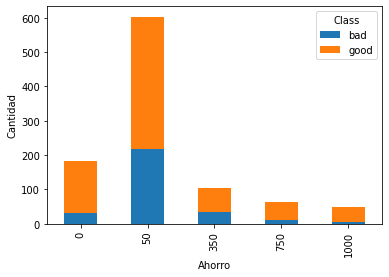

In [24]:
cross_table = pd.crosstab(data['savings_status'], data['class'])
cross_table.plot(kind='bar', stacked=True)
plt.xlabel('Ahorro')
plt.ylabel('Cantidad')
plt.legend(title='Class')
plt.show()

No se observa una notoria diferencia entre las cantidades de ahorro y en la clase en la que divide este dataset entre buen riesgo y mal riesgo.

Se procederá a crar un heatmap para verificar las correlaciones de las variables numéricas que tenemos en el dataset, de esta forma contribuye al análisis bivariado del problema. Antes de hacer esto, vamos a transformar los datos de la columna class para transformarla en datos numéricos y así pueda entrar en nuestro heatmap.

In [25]:
data['class'] = data['class'].map({'bad': 0, 'good': 1})

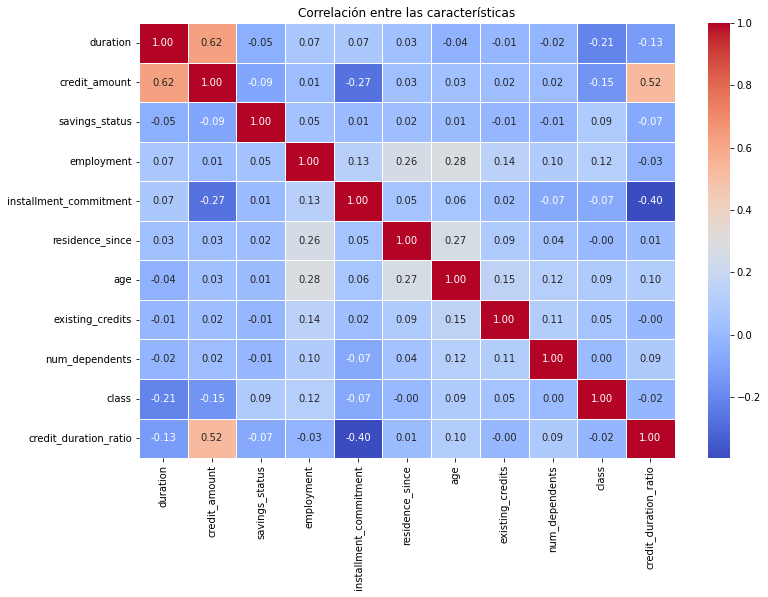

In [26]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre las características')
plt.show()

Vemos que la relación entre credit_amount y duration indicaría que a mayor tiempo a que se pide el crédito, mayor es el monto del mismo.

Este gráfico también nos permite ver que no existe una correlación realmente significativa entre ninguna de las variables, lo que es bueno para los modelos de machine learning con los que trabajaremos a continuación ya que hace que puedan mostrar resultados menos sesgados.

# Feature Selection

Se toma como matriz de datos a las columnas: age, duration, savings_status y employment. Se toma como el vector de variable objetivo a la columna "class". Para la feature selection voy a utilizar el método de "Recursive feature elimination", me interesó elegir este porque toma en cuenta varias varibles contra una objetivo y es el caso perfecto para mi dataset ya que quiero evaluar que tan riesgoso es entregar un crédito (objetivo) teniendo en cuenta varias variables (matriz de datos). Este método trabaja eliminando de forma recursiva datos que no son del todo relevantes hasta llegar al número de características que deseemos. En mi caso voy a elegir 10.

# Algoritmo de clasificación

En este caso se utilizará el método de regresióno logística. Si bien existen muchos modelos que podrían ser utilizados para este dataset, me interesó que este se comporta muy bien cuando la variable objetivo (en este caso class) tiene dos resultados posibles y brinda un porcentaje de que tan acertado es el modelo.

In [27]:
data1 = pd.read_csv("credit_customers.csv")

In [28]:
#Se agrega la columna credit_amount_ratio
data1['credit_duration_ratio'] = data1['credit_amount'] / data1['duration']

In [29]:
#Se transforman datos
data1['age'] = data1['age'].astype(int)
data1['age']

cambios_employment = {
    'unemployed': 0,
    '<1': 0.5,
    '4<=X<7': 5.5,
    '>=7': 7,
    '1<=X<4': 2.2
}

data1['employment'] = data1['employment'].replace(cambios_employment)
data1['employment']

data1['savings_status'] = data1['savings_status'].replace({
    'no known savings': 0,
    '<100': 50,
    '500<=X<1000': 750,
    '>=1000': 1000,
    '100<=X<500': 350
})

data1['employment'] = data1['employment'].replace({
    '1<=X<4': 2.5,
    '>=7': 7,
    '4<=X<7': 5,
    '<1': 0.5,
    'unemployed': 0
})

data1['checking_status'] = data1['checking_status'].replace({
    'no checking': 0,
    '<0': 0,
    '0<=X<200': 100,
    '>=200': 200
})

In [31]:
data2 = data1.copy()

In [32]:
# Obtener una lista de las columnas no numéricas
columnas_no_numericas = data2.select_dtypes(exclude=['number']).columns.tolist()

# Imprimir las columnas no numéricas
print("Columnas no numéricas:")
print(columnas_no_numericas)

Columnas no numéricas:
['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


In [33]:
data2_numerica = pd.get_dummies(data2, columns=columnas_no_numericas, drop_first=True)

In [34]:
data2_numerica['age_class'] = pd.cut(data2_numerica['age'], bins=[0, 25, 35, 45, 100], labels=['young', 'young_adult', 'adult', 'senior'])
#Lo uso para ver si esto mejora características no lineales en los modelos

In [35]:
data2_numerica['credit_amount_log'] = np.log(data2_numerica['credit_amount'])
#con esto mejoro las distibuciones asimétricas que pueda tener la columna del monto del crédito

In [36]:
data2_numerica['skilled_owner'] = data2_numerica['job_skilled'] * data2_numerica['housing_own']
#Esto para ver quien tiene un trabajo que requiere estudios y es dueño de una casa

In [37]:
data2_numerica['young_skilled'] = (data2_numerica['age'] < 30) * data2_numerica['job_skilled']
#para ver que si son jovenes con empleo calificado

In [38]:
data3 = data2_numerica.copy()

In [39]:
columnas_no_numericas = data3.select_dtypes(exclude=['number']).columns.tolist()
data3_numerica = pd.get_dummies(data3, columns=columnas_no_numericas, drop_first=True)
data3_numerica

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,...,job_unskilled resident,own_telephone_yes,foreign_worker_yes,class_good,credit_amount_log,skilled_owner,young_skilled,age_class_young_adult,age_class_adult,age_class_senior
0,0,6.0,1169.0,0,7.0,4.0,4.0,67,2.0,1.0,...,0,1,1,1,7.063904,1,0,0,0,1
1,100,48.0,5951.0,50,2.2,2.0,2.0,22,1.0,1.0,...,0,0,1,0,8.691315,1,1,0,0,0
2,0,12.0,2096.0,50,5.5,2.0,3.0,49,1.0,2.0,...,1,0,1,1,7.647786,0,0,0,0,1
3,0,42.0,7882.0,50,5.5,2.0,4.0,45,1.0,2.0,...,0,0,1,1,8.972337,0,0,0,1,0
4,0,24.0,4870.0,50,2.2,3.0,4.0,53,2.0,2.0,...,0,0,1,0,8.490849,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12.0,1736.0,50,5.5,3.0,4.0,31,1.0,1.0,...,1,0,1,1,7.459339,0,0,1,0,0
996,0,30.0,3857.0,50,2.2,4.0,4.0,40,1.0,1.0,...,0,1,1,1,8.257645,0,0,0,1,0
997,0,12.0,804.0,50,7.0,4.0,4.0,38,1.0,1.0,...,0,0,1,1,6.689599,1,0,0,1,0
998,0,45.0,1845.0,50,2.2,4.0,4.0,23,1.0,1.0,...,0,1,1,0,7.520235,0,1,0,0,0


In [40]:
data4 = data3_numerica.copy()

In [41]:
data4['duration_credit_amount_interaction'] = data4['duration'] * data4['credit_amount']

In [42]:
data4['credit_amount_age_ratio'] = data4['credit_amount'] / data4['age']

In [43]:
data4['employment_savings'] = data4['employment'].astype(str) + '_' + data4['savings_status'].astype(str)

# Evaluando modelos de Machine Learning

In [44]:
data_lr = data4.copy()
data_rf = data4.copy()
data_nb = data4.copy()
data_rn = data4.copy()

# Regresión logística 

In [45]:
X_lr = data_lr.drop('class_good', axis=1)
y_lr = data_lr['class_good']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

scaler_lr = StandardScaler()
X_train_scaled_lr = scaler_lr.fit_transform(X_train_lr)
X_test_scaled_lr = scaler_lr.transform(X_test_lr)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled_lr, y_train_lr)

y_pred_lr = logistic_model.predict(X_test_scaled_lr)

accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print(f'Accuracy Logistic Regression: {accuracy_lr:.2f}')
print(classification_report(y_test_lr, y_pred_lr))

Accuracy Logistic Regression: 0.76
              precision    recall  f1-score   support

           0       0.63      0.41      0.49        59
           1       0.78      0.90      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.65      0.67       200
weighted avg       0.74      0.76      0.74       200



# Random forest

In [46]:
X_rf = data_rf.drop('class_good', axis=1)
y_rf = data_rf['class_good']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

y_pred_rf = random_forest_model.predict(X_test_rf)

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f'Accuracy Random Forest: {accuracy_rf:.2f}')
print(classification_report(y_test_rf, y_pred_rf))

Accuracy Random Forest: 0.74
              precision    recall  f1-score   support

           0       0.62      0.31      0.41        59
           1       0.76      0.92      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.61      0.62       200
weighted avg       0.72      0.74      0.71       200



# Naive Bayes

In [47]:
X_nb = data_nb.drop('class_good', axis=1)
y_nb = data_nb['class_good']

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

y_pred_nb = nb_model.predict(X_test_nb)

accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f'Accuracy Naive Bayes: {accuracy_nb:.2f}')
print(classification_report(y_test_nb, y_pred_nb))

Accuracy Naive Bayes: 0.68
              precision    recall  f1-score   support

           0       0.38      0.17      0.24        59
           1       0.72      0.89      0.79       141

    accuracy                           0.68       200
   macro avg       0.55      0.53      0.51       200
weighted avg       0.62      0.68      0.63       200



# Redes neuronales

In [50]:
X_rn = data_rn.drop('class_good', axis=1)
y_rn = data_rn['class_good']

X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_rn, y_rn, test_size=0.2, random_state=42)

scaler_rn = StandardScaler()
X_train_scaled_rn = scaler_rn.fit_transform(X_train_rn)
X_test_scaled_rn = scaler_rn.transform(X_test_rn)

model_rn = Sequential()
model_rn.add(Dense(32, activation='relu', input_shape=(X_train_rn.shape[1],)))
model_rn.add(Dense(16, activation='relu'))
model_rn.add(Dense(1, activation='sigmoid'))

model_rn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rn.fit(X_train_scaled_rn, y_train_rn, epochs=10, batch_size=32, verbose=0)

_, accuracy_rn = model_rn.evaluate(X_test_scaled_rn, y_test_rn)
print(f'Accuracy Neural Network: {accuracy_rn:.2f}')

7/7 [==============================] - 1s 7ms/step - loss: 0.5841 - accuracy: 0.7000
Accuracy Neural Network: 0.70


### Bias variance tradeoff

Considerando el tradeoff entre el sesgo y la varianza podemos ver que en resultados generales el modelo que mejor resultados nos brindo a nivel global fue el de logistic regression. Muestra un buen recall para los resultados positivos (class good=1) como para los negativos (=0).
Los modelos de Random Forest y Naive Bayes son buenos para los resultados positivos pero presentan dificultades al momento de predecir los casos negativos (es decir los que efectivamente eran riesgosos).
Redes neuronales a nivel general funciona bien, muestra un buen resultado a nivel global entre la clase good y bad, pero este es menor que el de la regresión logística, por lo que nos quedamos con este modelo como el mejor para este dataset y para esta específica transformación de datos.

In [51]:
data_pca = data4.copy()

                                                    PC1       PC2
checking_status                               -0.004347 -0.045309
duration                                       0.307961 -0.068172
credit_amount                                  0.418546 -0.066864
savings_status                                -0.041339  0.015374
employment                                     0.043554  0.294030
installment_commitment                        -0.107263  0.094624
residence_since                                0.057404  0.217663
age                                            0.037698  0.392333
existing_credits                               0.032814  0.176928
num_dependents                                 0.034244  0.154195
credit_duration_ratio                          0.198607 -0.001384
credit_history_critical/other existing credit -0.003293  0.201789
credit_history_delayed previously              0.074491  0.009955
credit_history_existing paid                  -0.075650 -0.184460
credit_his

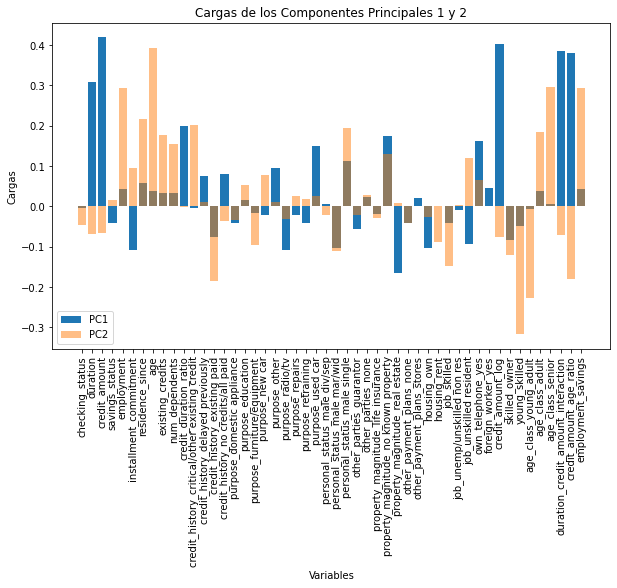

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

X = data_pca.drop('class_good', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Se eligen 2 variables
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

component_names = [f'PC{i + 1}' for i in range(2)]
loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=X.columns)

print(loadings)

plt.figure(figsize=(10, 6))
plt.bar(loadings.index, loadings['PC1'], label='PC1')
plt.bar(loadings.index, loadings['PC2'], label='PC2', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Cargas')
plt.legend()
plt.title('Cargas de los Componentes Principales 1 y 2')
plt.show()

#### PC1

Vemos que las variables con mayor significancia son las que tienen que ver con el monto del crédito y su relación a la duración y edad.

#### PC2

Muestra mejores resultados en las variables que se relacionan con el empleo, la edad y las columnas que relacionan ambas variables.

# Cross Validation 

In [53]:
datacross = data4.copy()

from sklearn.model_selection import cross_val_score

X = datacross.drop('class_good', axis=1)
y = datacross['class_good']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
#se van a usar 5 folds

print('Accuracy para cada fold:', scores)
print('Accuracy promedio:', np.mean(scores))

C:\Users\fer20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fer20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Accuracy para cada fold: [0.7   0.705 0.69  0.68  0.725]
Accuracy promedio: 0.7


C:\Users\fer20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fer20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cuando vemos los resultados para cada fold, se puede notar que no varían demasiado. El promedio de 0,7 indica que el modelo tiene una precisión del 70% en la calificación (en promedio).

Los resultados presentan una coherencia con respecto al accuracy que se vio en el modelo de regresión logística, que fue de 0.76. 

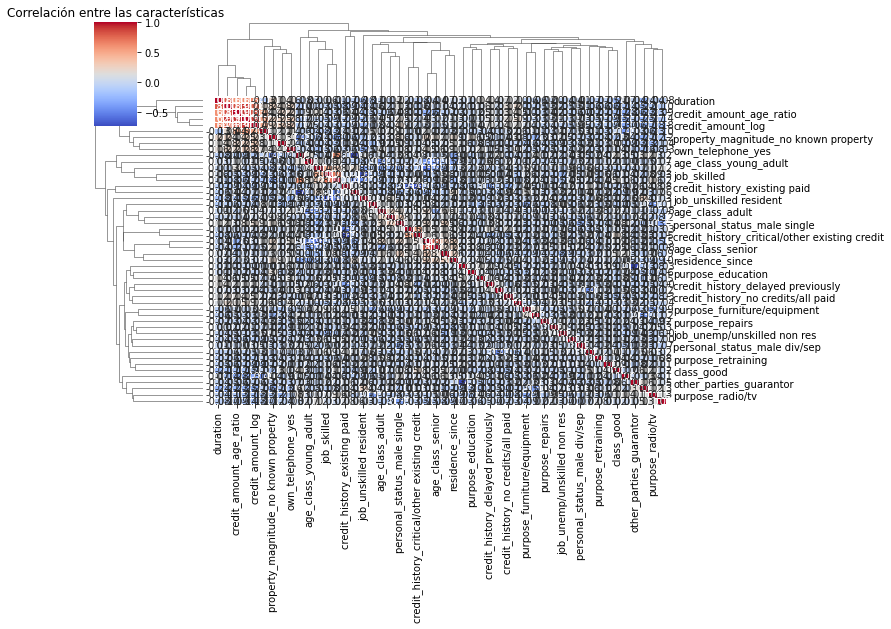

In [54]:
correlation_matrix = data4.corr()

g = sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
g.fig.set_size_inches(12, 8)
plt.title('Correlación entre las características')
plt.show()

# Conclusiones

En la etapa de evaluación de nuestras hipótesis iniciales, se ha observado que existen correlaciones estadísticamente significativas entre ciertos factores y el riesgo crediticio. En primer lugar, se ha constatado una correlación inversa entre la edad del solicitante y el riesgo crediticio; a medida que la edad disminuye, el riesgo de otorgar un crédito tiende a aumentar. Este hallazgo valida nuestra primera hipótesis. Adicionalmente, se ha identificado una relación inversa entre la duración del empleo del solicitante y el riesgo crediticio, respaldando nuestra segunda hipótesis. Sin embargo, no se ha encontrado evidencia que respalde nuestra tercera hipótesis, que postulaba una relación significativa entre la cantidad de ahorro y el riesgo crediticio.

En la fase de evaluación de modelos de machine learning, el modelo de regresión logística se ha destacado como el más eficaz en la tarea de predicción de riesgo crediticio. Este resultado era previsible, dado que nuestro objetivo es de naturaleza binaria, y la regresión logística es un enfoque apropiado para este tipo de predicción. No obstante, es fundamental destacar que estas conclusiones se derivan de la transformación y el análisis de los datos en nuestro conjunto de datos específico. En futuras investigaciones, podríamos explorar otras transformaciones de datos o realizar análisis más detallados con el fin de obtener conclusiones aún más precisas y significativas.